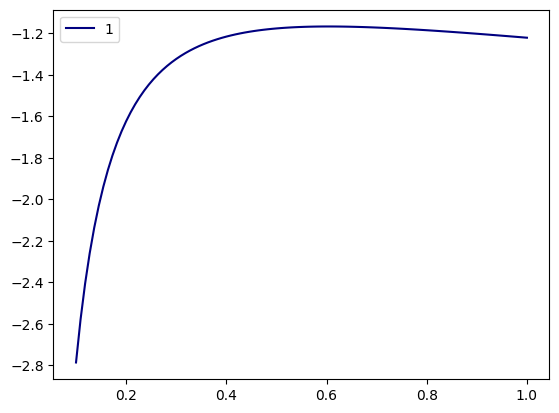

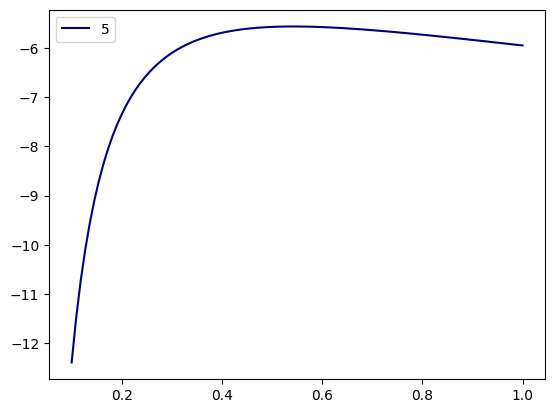

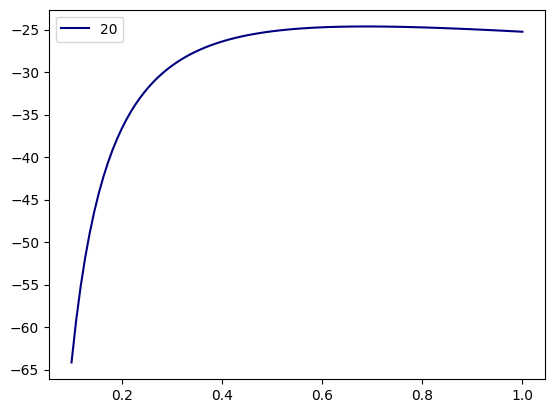

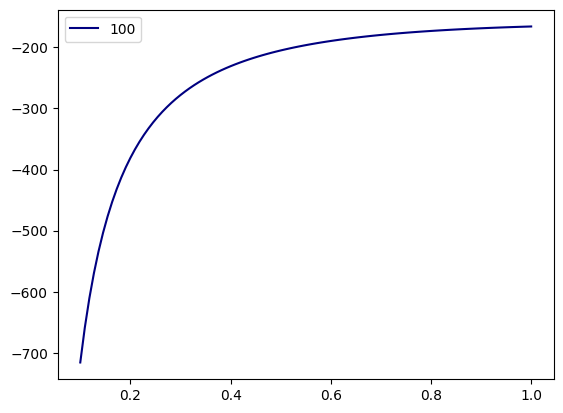

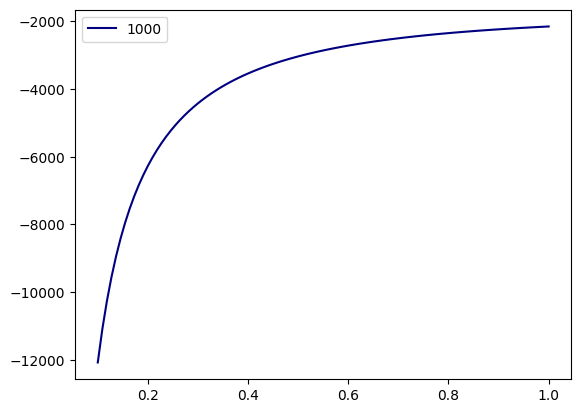

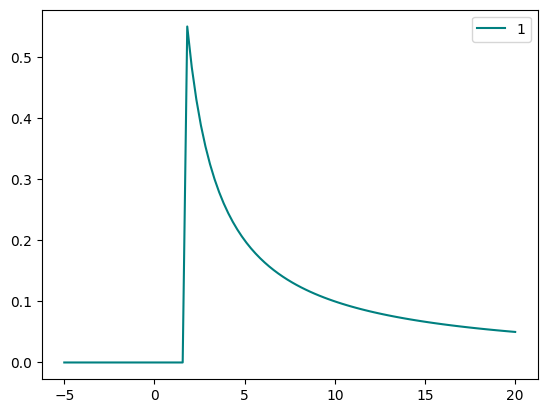

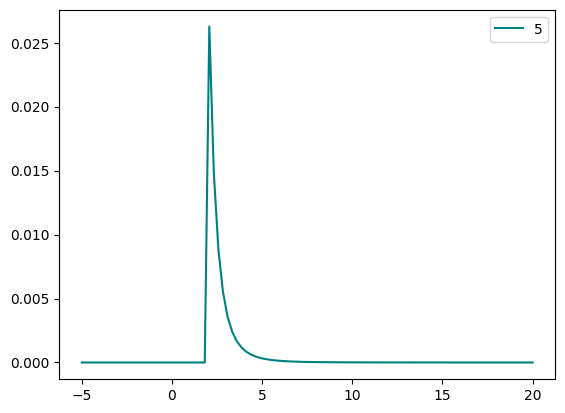

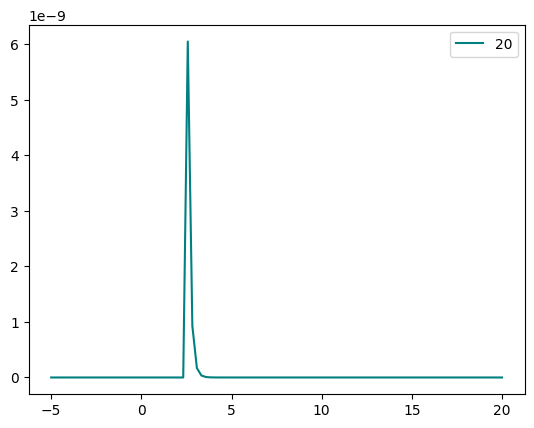

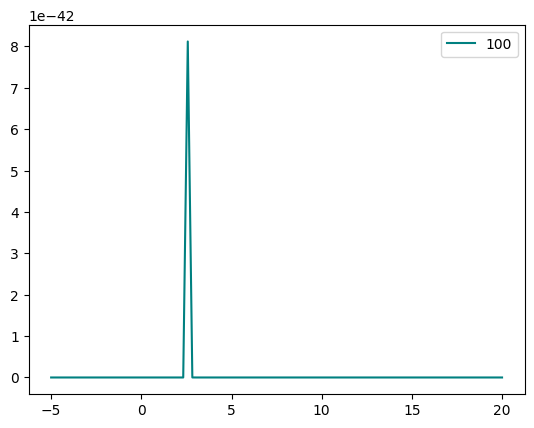

In [ ]:
import math
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

def lnL(a:float, n:int):
  data=np.random.normal(loc=0, scale=np.sqrt(a), size=n)
  s=0
  for i in range(n):
    s+=(data[i])**2
  return ((-1)*n/2) * (np.log(2*np.pi) + np.log(a)) - (1/(2*a))*s

def I(X, a, n):
  return (0<=X[0])&(X[n-1]<=a)



N=[1, 5, 20, 100, 1000]







for i in range(len(N)):
  theta = np.random.uniform(0, 5)

  data = np.random.normal(loc = 0, scale = np.sqrt(theta), size=N[i])

  def lnL(a:float, n:int):
    s=0
    for i in range(n):
      s+=(data[i])**2
    return ((-1)*n/2) * (np.log(2*np.pi) + np.log(a)) - (1/(2*a))*s

  a = np.linspace(0.1,1,100)


  plt.plot(a, lnL(a, N[i]), label=N[i], color='navy')
  plt.legend()
  plt.show()



for i in range(len(N)-1):
  a = np.linspace(-5, 20,100)

  data = np.random.uniform(0, theta, size=N[i])
  data.sort()

  plt.plot(a, 1/(a**N[i]) * I(data, a, N[i]), label=N[i], color='teal')
  plt.legend()
  plt.show()



In [ ]:
## Задача 2
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import scipy.optimize
from scipy.stats import cauchy
from scipy.optimize import minimize
from numpy import quantile
from scipy.stats import norm
from math import fabs
import numpy as np
import matplotlib.pyplot as plt

def f(x0, k, *values, b):
  lnL = k * (np.log(b) - np.log(np.pi))
  for i in range(k):
    lnL -= k * np.log((values[i] - x0)**2 + b**2)
  return -lnL


N = [5,10,20,50,100]
k = 500
a=1
b=1

for n in N:
  MLE=[]
  MED=[]
  X=cauchy.rvs(loc=a, size=k, scale=b)
  for i in range(n-1):
    Y=cauchy.rvs(loc=a, size=k)
    X=np.vstack([X,Y])
  for i in range (n):
    def f(param):
      x0=param[0]
      lnL = k * (np.log(b) - np.log(np.pi))
      for j in range(k):
        lnL -= k * np.log((X[i][j] - x0)**2 + b**2)
      return -lnL

    result=sc.optimize.minimize(f, 0.3)
    mle=result.x
    MLE.append(mle)
    med=np.median(X[i])
    MED.append(med)

  print("n = ", n)
  print("Выборочное среднее MLE:",  np.mean(MLE))
  print("Выборочное среднее MED:",  np.mean(MED))
  print("Выборочная дисперсия MLE:",  np.var(MLE))
  print("Выборочная дисперсия MED:",  np.var(MED))
  print("")




n =  5
Выборочное среднее MLE: 0.996999169647706
Выборочное среднее MED: 1.0006509209646286
Выборочная дисперсия MLE: 0.00535638879725144
Выборочная дисперсия MED: 0.0036163954441352218

n =  10
Выборочное среднее MLE: 0.9640841408639187
Выборочное среднее MED: 0.9578732901897231
Выборочная дисперсия MLE: 0.004371421989825342
Выборочная дисперсия MED: 0.006006911067674037

n =  20
Выборочное среднее MLE: 1.015571402014544
Выборочное среднее MED: 1.0142265392132241
Выборочная дисперсия MLE: 0.003338290545972715
Выборочная дисперсия MED: 0.003943693124642524

n =  50
Выборочное среднее MLE: 1.0068412361117058
Выборочное среднее MED: 1.0042343744926818
Выборочная дисперсия MLE: 0.0027052973033779397
Выборочная дисперсия MED: 0.003527843281713183

n =  100
Выборочное среднее MLE: 1.0006754463224186
Выборочное среднее MED: 0.9955337342050062
Выборочная дисперсия MLE: 0.005470330372780492
Выборочная дисперсия MED: 0.006009385133704838



θ₁:  0.2635940700406287  θ₂:  0.25886351122022383  θ₃:  0.2635940661294363
167 487 276


NameError: ignored

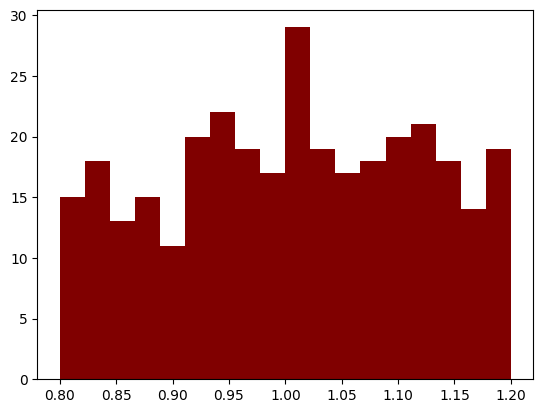

In [ ]:
#Задача 3
import scipy.optimize
import math
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


n=5
a=1

data=stats.norm(loc=a, scale=1).rvs(size=n)
data.sort()

t1=np.mean(data)

def D(x):
  D=stats.norm.cdf(data[0], loc=x, scale=1)
  for i in range(1, n):
    D*=(stats.norm.cdf(data[i], loc=x, scale=1) - stats.norm.cdf(data[i-1], loc=x, scale=1))
  D*=(1 - stats.norm.cdf(data[n-1], loc=x, scale=1))
  return -D

res=scipy.optimize.minimize_scalar(D)
t2=res.x

def L(x):
  lnL = (n/2) * np.log(np.pi)
  for i in range(n):
    lnL -= (1/2) * ((data[i] - x)**2)
  return -lnL

ress=scipy.optimize.minimize_scalar(L)
t3=ress.x

print("θ\u2081: ", t1, " θ\u2082: ", float(t2), " θ\u2083: ", float(t3))


k=1000
T1=[]
T2=[]
T3=[]
T11=[]
T22=[]
T33=[]
n1=0
n2=0
n3=0
for i in range(k):
  a=1

  data=stats.norm(loc=a, scale=1).rvs(size=n)
  data.sort()

  t1=np.mean(data)

  def D(x):
    D=stats.norm.cdf(data[0], loc=x, scale=1)
    for i in range(1, n):
      D*=(stats.norm.cdf(data[i], loc=x, scale=1) - stats.norm.cdf(data[i-1], loc=x, scale=1))
    D*=(1 - stats.norm.cdf(data[n-1], loc=x, scale=1))
    return -D

  res=scipy.optimize.minimize_scalar(D)
  t2=res.x

  def L(x):
    lnL = (n/2) * np.log(np.pi)
    for i in range(n):
      lnL -= (1/2) * ((data[i] - x)**2)
    return -lnL

  ress=scipy.optimize.minimize_scalar(L)
  t3=ress.x

  r1=math.fabs(t1-a)
  r2=math.fabs(t2-a)
  r3=math.fabs(t3-a)

  if (r1 < r2)&(r1 < r3):
    n1+=1
  if (r2 < r1)&(r2 < r3):
    n2+=1
  if (r3 < t2)&(r3 < r1):
    n3+=1




  T1.append(t1)
  T2.append(t2)
  T3.append(t3)

  T11.append(np.sqrt(k)*(t1-a))
  T22.append(np.sqrt(k)*(t2-a))
  T33.append(np.sqrt(k)*(t3-a))

print(n1, n2, n3)

plt.hist(T1, label='ОММ', color='maroon', bins=18, range=(0.8, 1.2))
plt.axvline (x=theta, color='green', linestyle='--')
plt.legend()
plt.show()

plt.hist(T2, label='ОМС', color='peachpuff', bins=18, range=(0.8, 1.2))
plt.axvline (x=theta, color='green', linestyle='--')
plt.legend()
plt.show()

plt.hist(T3, label='ОМП', color='darkviolet', bins=18, range=(0.8, 1.2))
plt.axvline (x=theta, color='green', linestyle='--')
plt.legend()
plt.show()

plt.hist(T11, label='ОММ', color='plum', bins=18, alpha=0.4)
plt.hist(T22, label='ОМС', color='tomato', bins=18, alpha=0.4)
plt.hist(T33, label='ОМП', color='paleturquoise', bins=18, alpha=0.4)
plt.axvline (x=theta, color='green', linestyle='--')
plt.legend()
plt.show()



